In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

In [6]:
import os
import kagglehub

# cargando los datos de kaggle
path_kagglehub_dataset = kagglehub.dataset_download("manusmitajha/countrydatacsv")
paht_df = os.path.join(path_kagglehub_dataset, "Country-data.csv")
df_country = pd.read_csv(paht_df)
df_country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [7]:
# verificando la presencia de valores nulos
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# estadisticas descriptivas
df_country.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [9]:
# verificando la duplicidad de valores
df_country[df_country.duplicated()]

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []

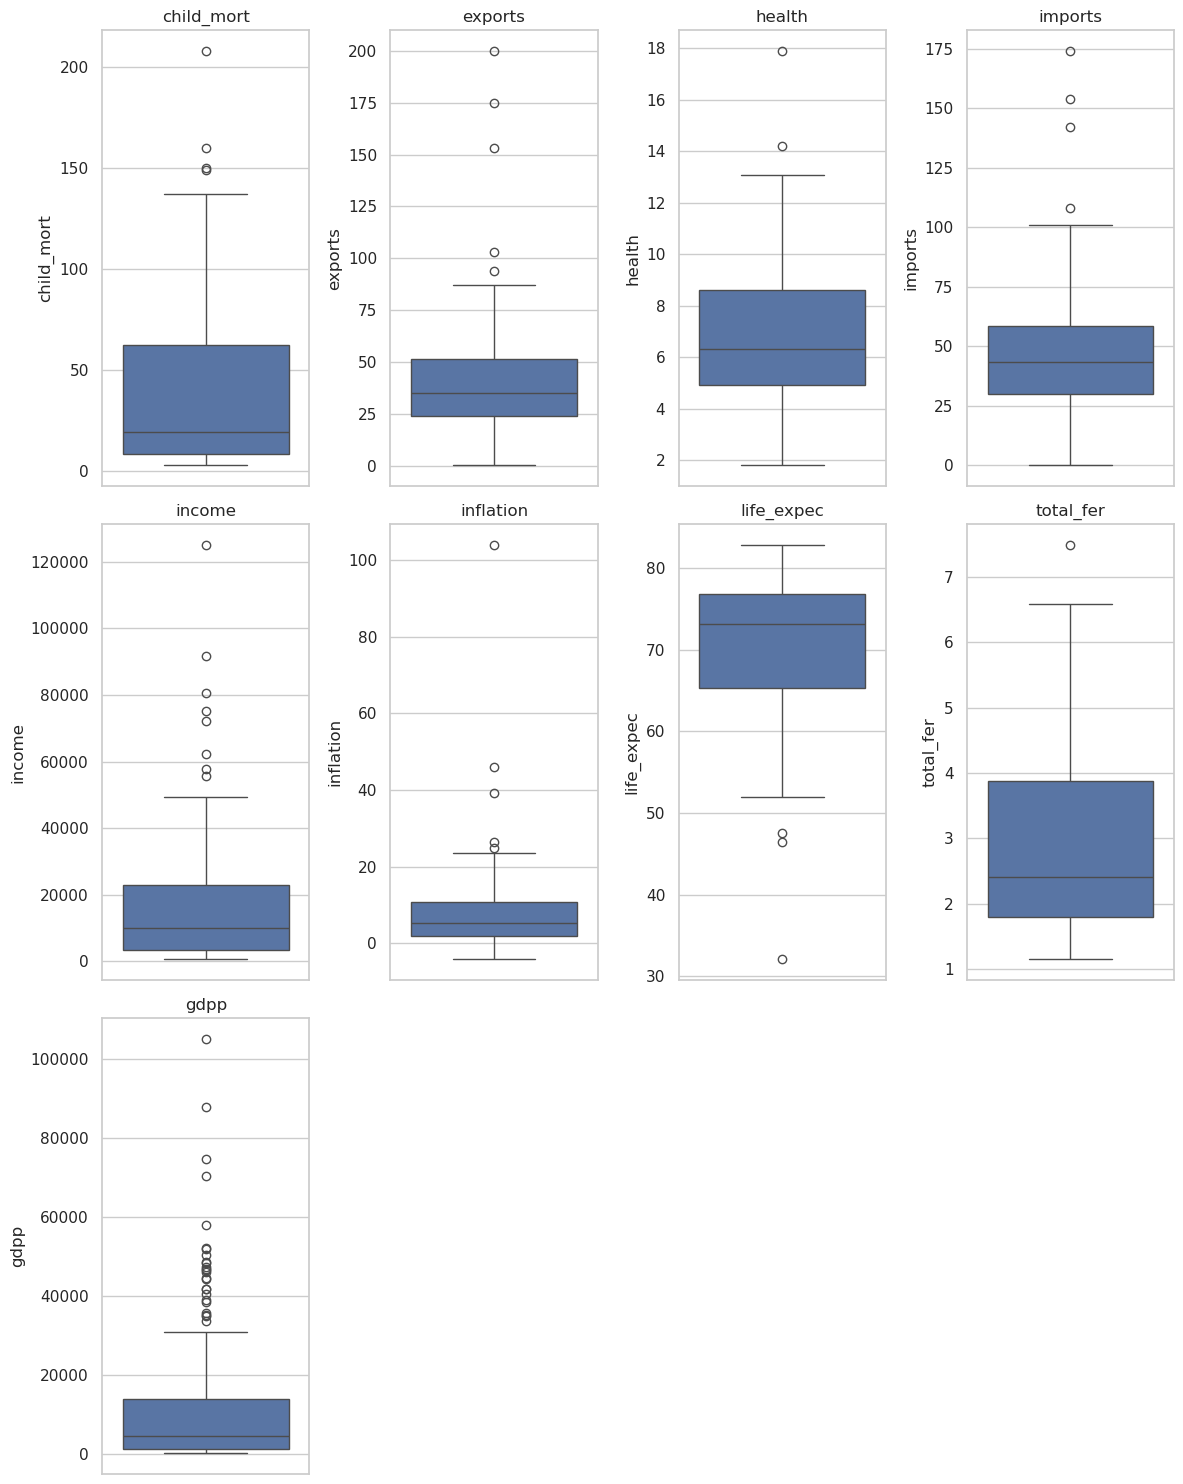

In [10]:
# observando la dispersión de los datos de acuerdo a cada variable
cols_num = df_country.select_dtypes(exclude="object").columns
fig, ax = plt.subplots(3, 4, figsize=(12, 15))
ax = ax.flat
for i, col in enumerate(cols_num):
    sns.boxplot(data=df_country, y=col, ax=ax[i])
    ax[i].set_title(col)
for i in range(9, 12):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

In [11]:
df_country.iloc[df_country["inflation"].idxmax(), 0]

'Nigeria'

In [8]:
# sns.pairplot(df_country)

   variable_1  variable_2         r
0        gdpp      income  0.895571
1      income        gdpp  0.895571
2  child_mort   total_fer  0.848478
3   total_fer  child_mort  0.848478
4     exports     imports  0.737381
5     imports     exports  0.737381
6  life_expec      income  0.611962
7      income  life_expec  0.611962
8        gdpp  life_expec  0.600089
9  life_expec        gdpp  0.600089


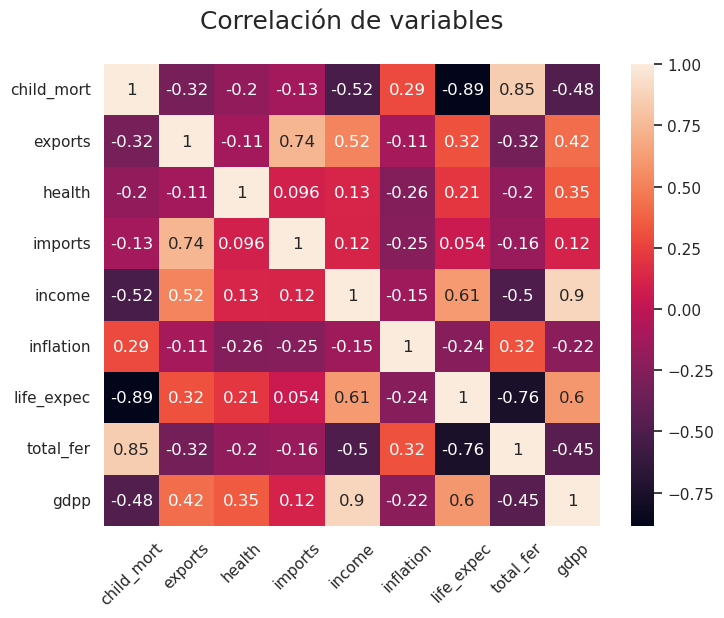

In [12]:
# visualizando la correlación de las variables
df_country_corr = df_country[cols_num].corr()
df_country_corr = df_country_corr.stack().reset_index()
df_country_corr.columns = ["variable_1", "variable_2", "r"]
print(df_country_corr.loc[df_country_corr["variable_1"] != df_country_corr["variable_2"]].sort_values("r", ascending=False).reset_index(drop=True).head(10))

plt.figure(figsize=(8, 6))
sns.heatmap(df_country[cols_num].corr(), annot=True)
plt.title("Correlación de variables\n", size=18)
plt.xticks(rotation=45)
plt.show()

## Normalizando las variables numéricas

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_country_sc = sc.fit_transform(df_country[cols_num])
df_country_sc = pd.DataFrame(df_country_sc, columns=df_country[cols_num].columns)
df_country_sc

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

## Aplicando el análisis de compomentes principales (PCA)

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
df_country_sc_pca = pca.fit_transform(df_country_sc)
df_country_sc_pca = pd.DataFrame(df_country_sc_pca, columns=[f"comp_{i}" for i in range(1, df_country_sc_pca.shape[1]+1)])
df_country_sc_pca

comp_1    comp_2    comp_3    comp_4    comp_5    comp_6    comp_7  \
0   -2.913025  0.095621 -0.718118  1.005255 -0.158310  0.254597 -0.383000   
1    0.429911 -0.588156 -0.333486 -1.161059  0.174677 -0.084579 -0.248919   
2   -0.285225 -0.455174  1.221505 -0.868115  0.156475  0.401696  0.087214   
3   -2.932423  1.695555  1.525044  0.839625 -0.273209  0.547996  0.440835   
4    1.033576  0.136659 -0.225721 -0.847063 -0.193007  0.206919 -0.241978   
..        ...       ...       ...       ...       ...       ...       ...   
162 -0.820631  0.639570 -0.389923 -0.706595 -0.395748 -0.009059  0.098738   
163 -0.551036 -1.233886  3.101350 -0.115311  2.082581 -0.097274 -0.206735   
164  0.498524  1.390744 -0.238526 -1.074098  1.176081 -0.051607  0.143627   
165 -1.887451 -0.109453  1.109752  0.056257  0.618365  0.540917 -0.060256   
166 -2.864064  0.485998  0.223167  0.816364 -0.274068 -0.201378  0.442185   

       comp_8    comp_9  
0   -0.415076  0.014148  
1    0.221042 -0.173316  
2    0.184162 -0.084037  
3    0.355998  0.091339  
4    0.023681 -0.094270  
..        ...       ...  
162 -0.521886  0.497803  
163  0.078805  0.275735  
164  0.217590  0.036522  
165 -0.089495  0.096049  
166 -0.664338  0.441482  

[167 rows x 9 columns]

### Distribución de la varianza por cada componente

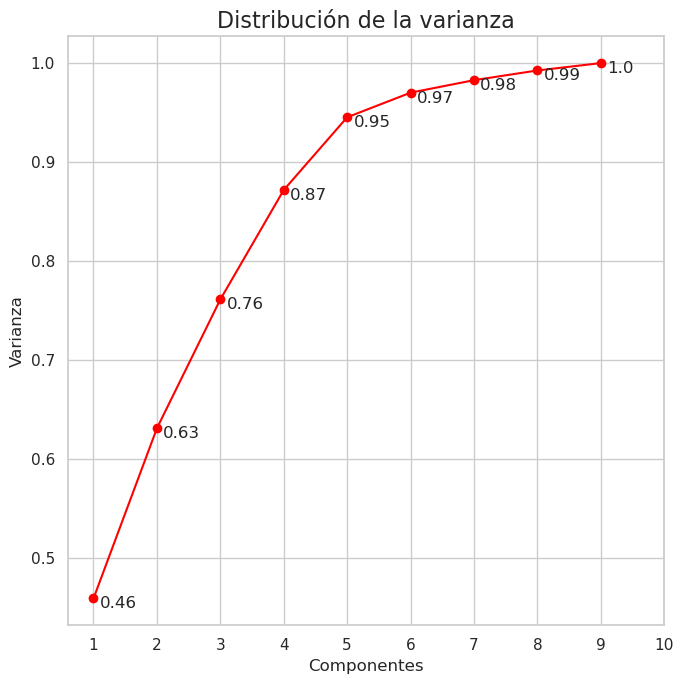

In [15]:
variance_cum = np.cumsum(pca.explained_variance_ratio_)
num_comp = range(1, len(variance_cum)+1)
plt.figure(figsize=(7,7))
for i, cum in enumerate(variance_cum, start=1):
    plt.annotate(round(cum, 2), xy=(i+0.1,cum-0.01))
plt.plot(num_comp, variance_cum, color="red", marker="o")
plt.xticks(range(1, 11))
plt.title("Distribución de la varianza", size=16)
plt.xlabel("Componentes")
plt.ylabel("Varianza")
plt.tight_layout()
plt.show()

Se selecciona los primeros 5 componentes ya que son los que acumula 95% de varianza

In [16]:
df_country_sc_pca_main = df_country_sc_pca.iloc[:, 0:5]

## K-Means

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sum_of_squared_error = []
silhouette_scores = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    y = kmeans.fit_predict(df_country_sc_pca_main)
    sum_of_squared_error.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_country_sc_pca_main, y))

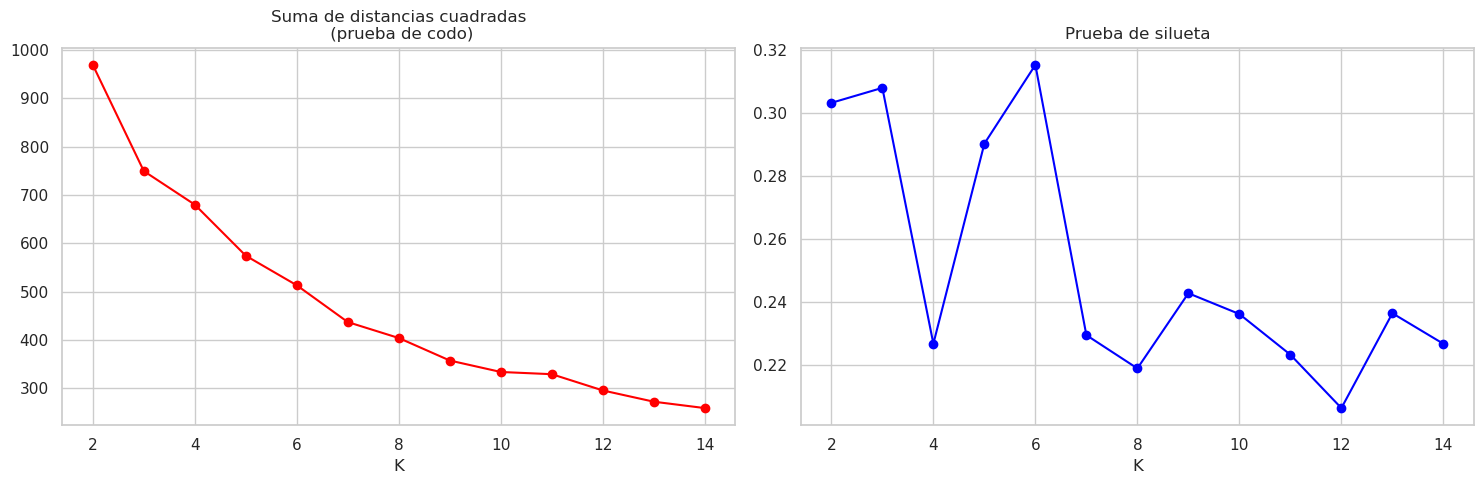

In [18]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title("Suma de distancias cuadradas\n (prueba de codo)")
ax[0].plot(k_range, sum_of_squared_error, "-o", color="red")
ax[0].set_xlabel("K")

ax[1].set_title("Prueba de silueta")
ax[1].plot(k_range, silhouette_scores, "-o", color="blue")
ax[1].set_xlabel("K")
plt.tight_layout()
plt.show()

In [19]:
kmeans_train = KMeans(n_clusters=4, random_state=32)
y_kmeans = kmeans_train.fit_predict(df_country_sc_pca_main)
print(round(silhouette_score(df_country_sc_pca_main, y_kmeans),3))
df_country["y_kmeans"] = y_kmeans

0.329


## Agglomerative clustering

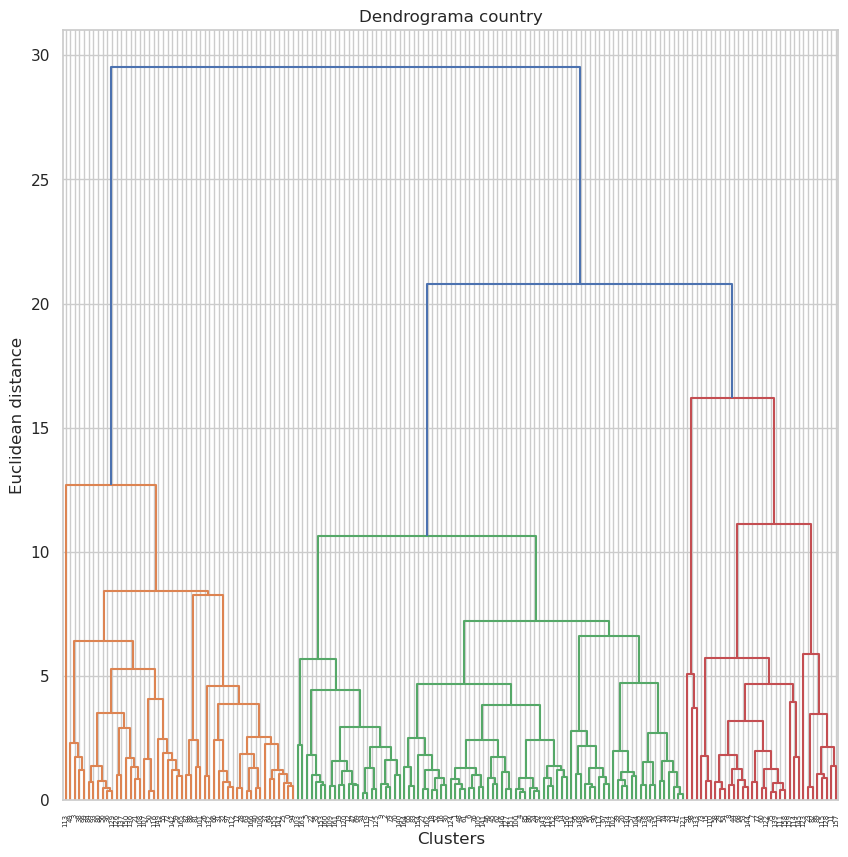

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_country_sc_pca_main, method="ward"))
plt.title("Dendrograma country")
plt.xlabel("Clusters")
plt.ylabel("Euclidean distance")
plt.show()

In [21]:
ac = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
y_hc = ac.fit_predict(df_country_sc_pca_main)
print(round(silhouette_score(df_country_sc_pca_main, y_hc), 3))
df_country["y_hc"] = y_hc

0.314


## DBSCAN

In [22]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_sc_pca_main)
distances, indices = neighbors_fit.kneighbors(df_country_sc_pca_main)

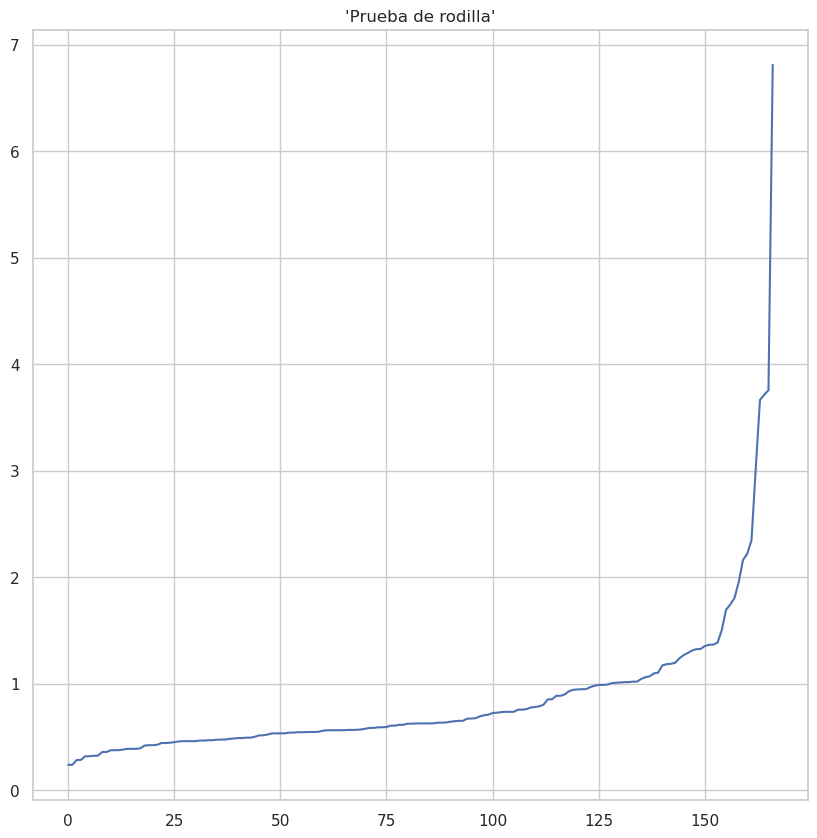

In [23]:
distances = np.sort(distances, axis=0)
plt.figure(figsize=(10, 10))
plt.plot(distances[:,1])
plt.title("'Prueba de rodilla'")
plt.show()

In [28]:
from itertools import product

eps_values = np.arange(1, 1.5, 0.10)
min_samples = range(3, 12)

dbscan_params = list(product(eps_values, min_samples))
num_of_clusters = []
sil_scores = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_sc_pca_main)
    try:
        sil_scores.append(silhouette_score(df_country_sc_pca_main, y_dbscan))
    except:
        sil_scores.append(0)
    unique_clusters = np.unique(y_dbscan)    
    # unique_clusters = np.unique(y_dbscan) >= 0
    num_of_clusters.append(len(unique_clusters))


In [29]:
df_param = pd.DataFrame(dbscan_params, columns=['Eps','Min_samples'])
df_param['sil_score'] = sil_scores
df_param['n_clusters'] = num_of_clusters
df_param.head()

Eps  Min_samples  sil_score  n_clusters
0  1.0            3  -0.185938           4
1  1.0            4   0.163123           2
2  1.0            5   0.115245           3
3  1.0            6   0.154213           4
4  1.0            7   0.153042           4

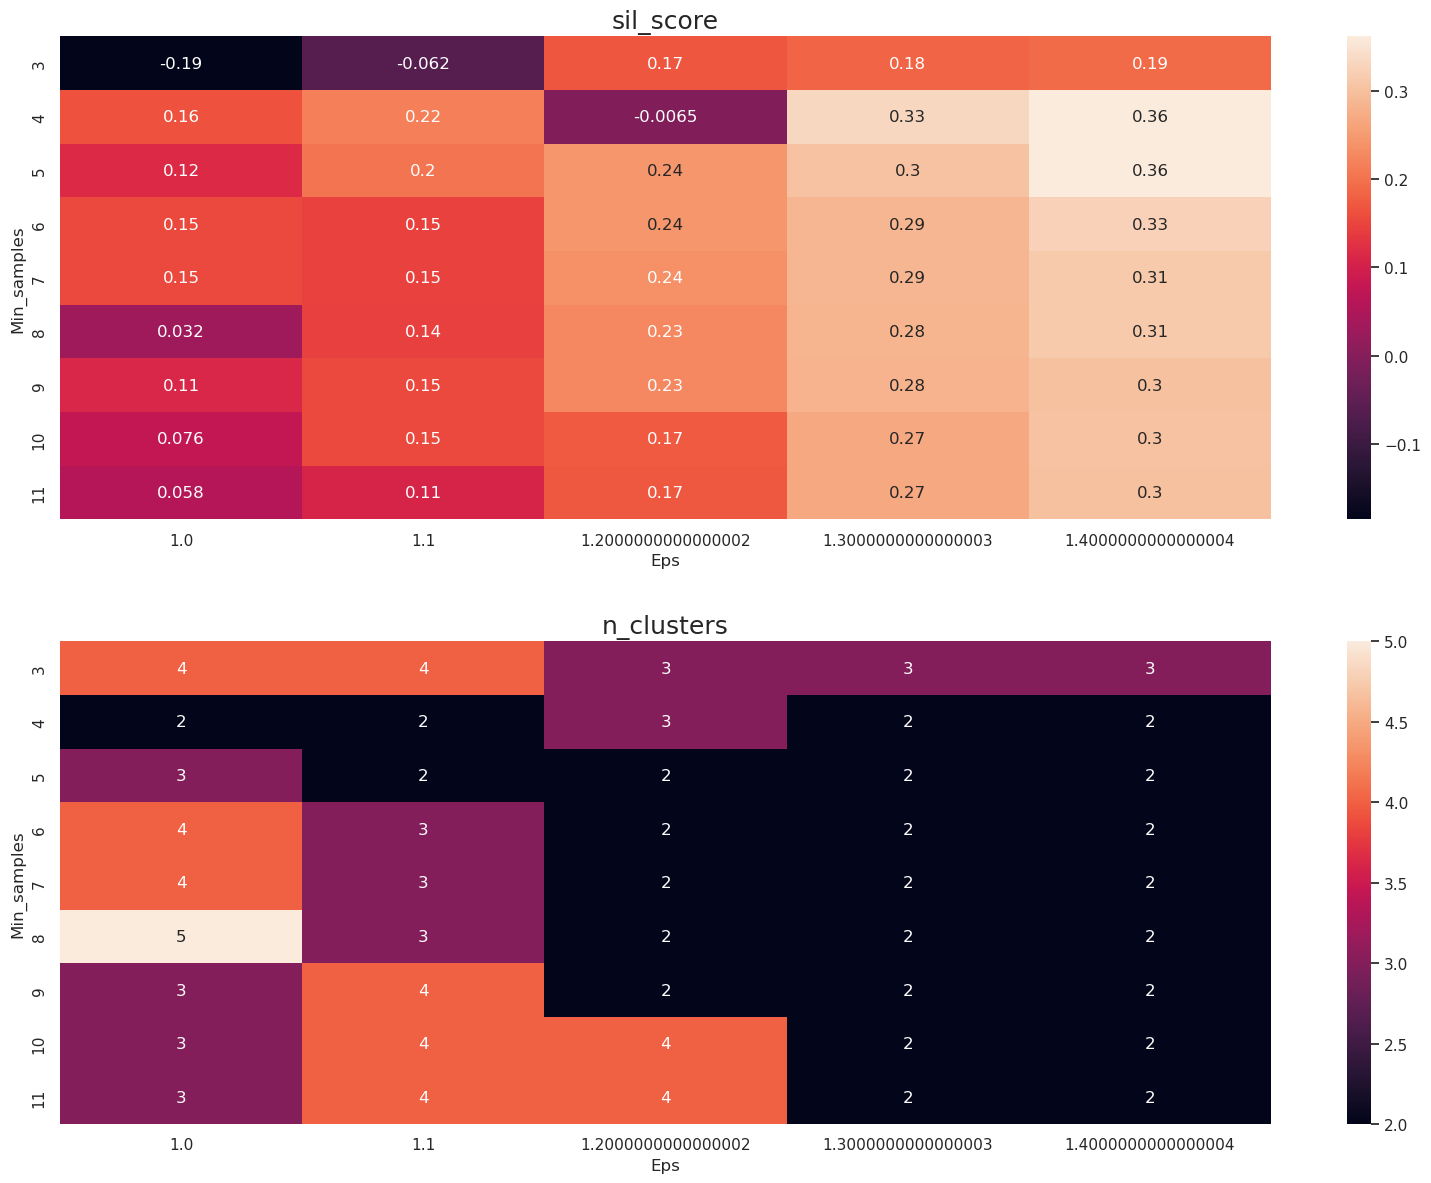

In [30]:
df_param_pivot = pd.pivot_table(df_param, values="sil_score", index="Min_samples", columns="Eps")
df_param_pivot_1 = pd.pivot_table(df_param, values="n_clusters", index="Min_samples", columns="Eps")

fig, ax = plt.subplots(2, 1, figsize=(16,12))
ax[0].set_title("sil_score", size=18)
sns.heatmap(df_param_pivot, ax=ax[0], annot=True)
ax[1].set_title("\nn_clusters", size=18)
sns.heatmap(df_param_pivot_1, ax=ax[1], annot=True)
plt.tight_layout()
plt.show()

Seleccionando los parámetros mas óptimos

In [38]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_sc_pca_main)
print(silhouette_score(df_country_sc_pca_main, y_dbscan))
df_country["y_dbscan"] = y_dbscan

0.16757625241357266


In [39]:
df_country

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  y_kmeans  y_hc  y_dbscan  
0         9.44        56.2       5.82    553         1     0         0  
1         4.49        76.3       1.65   4090         0     2         0  
2        16.10        76.5       2.89   4460         0     2         0  
3        22.40        60.1       6.16   3530         1     0        -1  
4         1.44        76.8       2.13  12200         0     2         0  
..         ...         ...        ...    ...       ...   ...       ...  
162       2.62        63.0       3.50   2970         0     2         0  
163      45.90        75.4       2.47  13500         0     2        -1  
164      12.10        73.1       1.95   1310         0     2         0  
165      23.60        67.5       4.67   1310         1     0         0  
166      14.00        52.0       5.40   1460         1     0         0  

[167 rows x 13 columns]

visualizando las clasificaciones de acuerdo a DBSCAN y se aprecia la segmentación que tiene a los otuliers el cual lleva la etiqueta -1

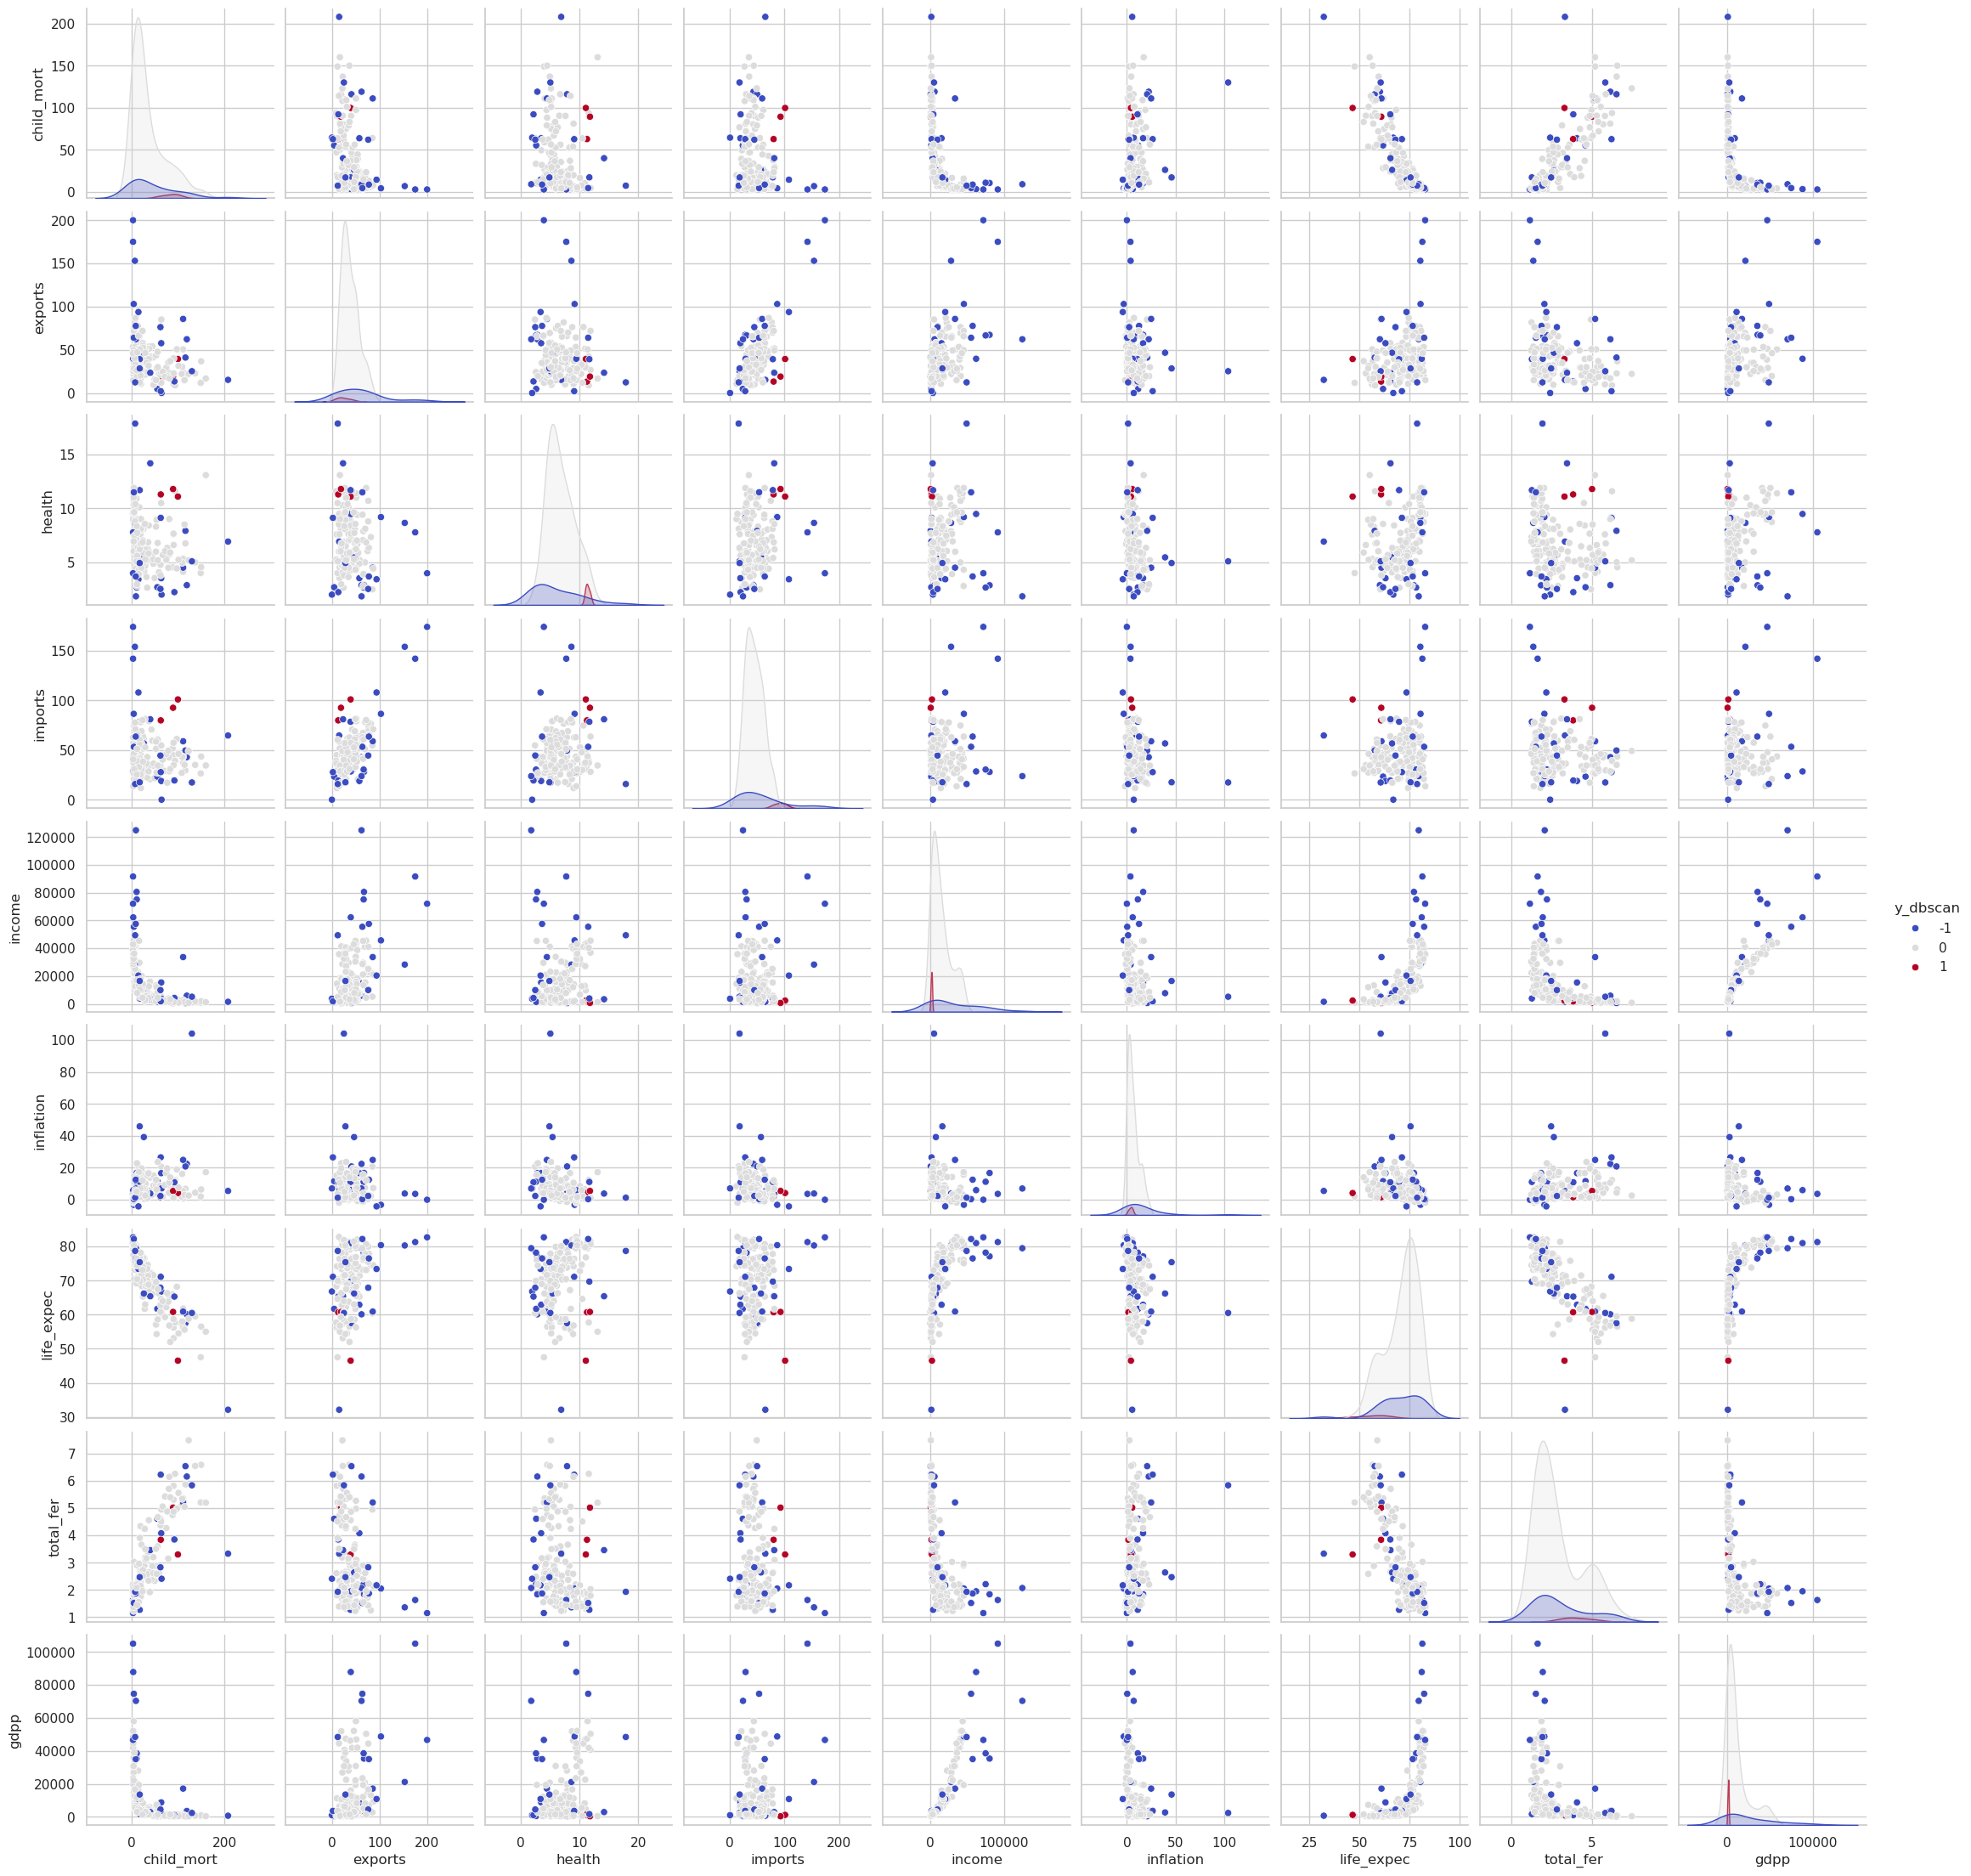

In [41]:
sns.pairplot(data = df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'y_dbscan']], hue='y_dbscan', palette='coolwarm')
plt.show()

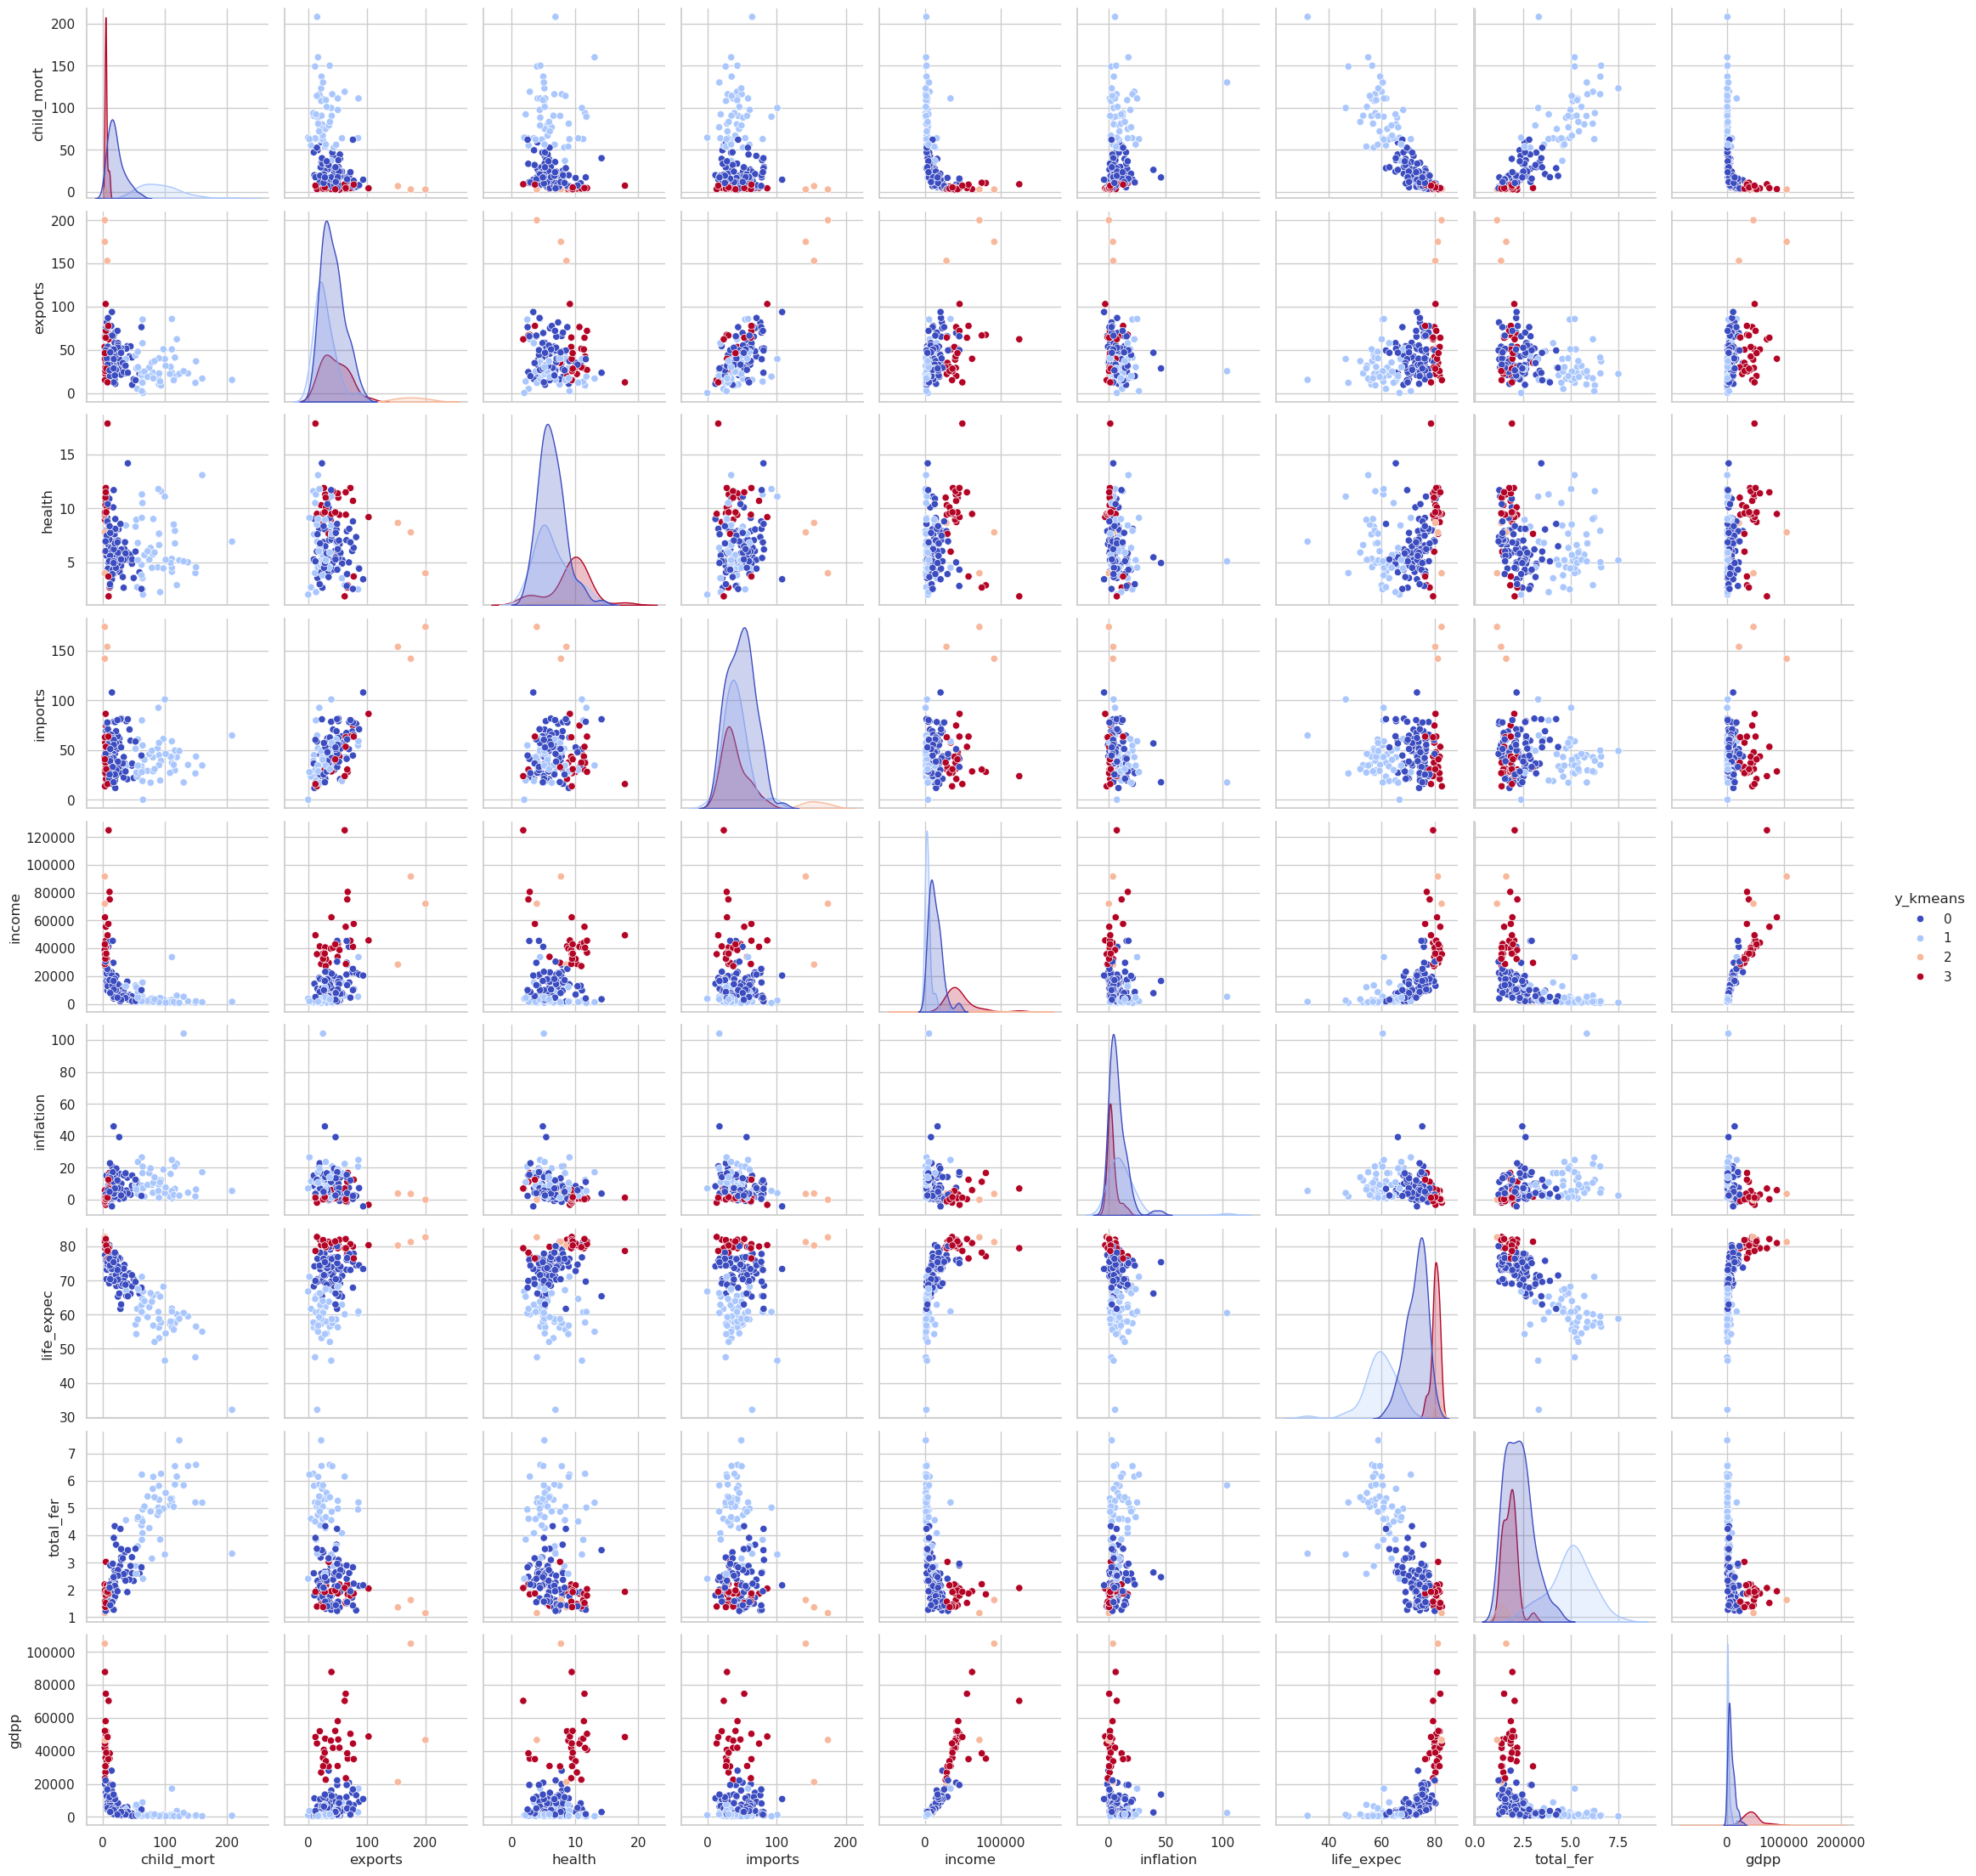

In [40]:
sns.pairplot(data = df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'y_kmeans']], hue='y_kmeans', palette='coolwarm')
plt.show()

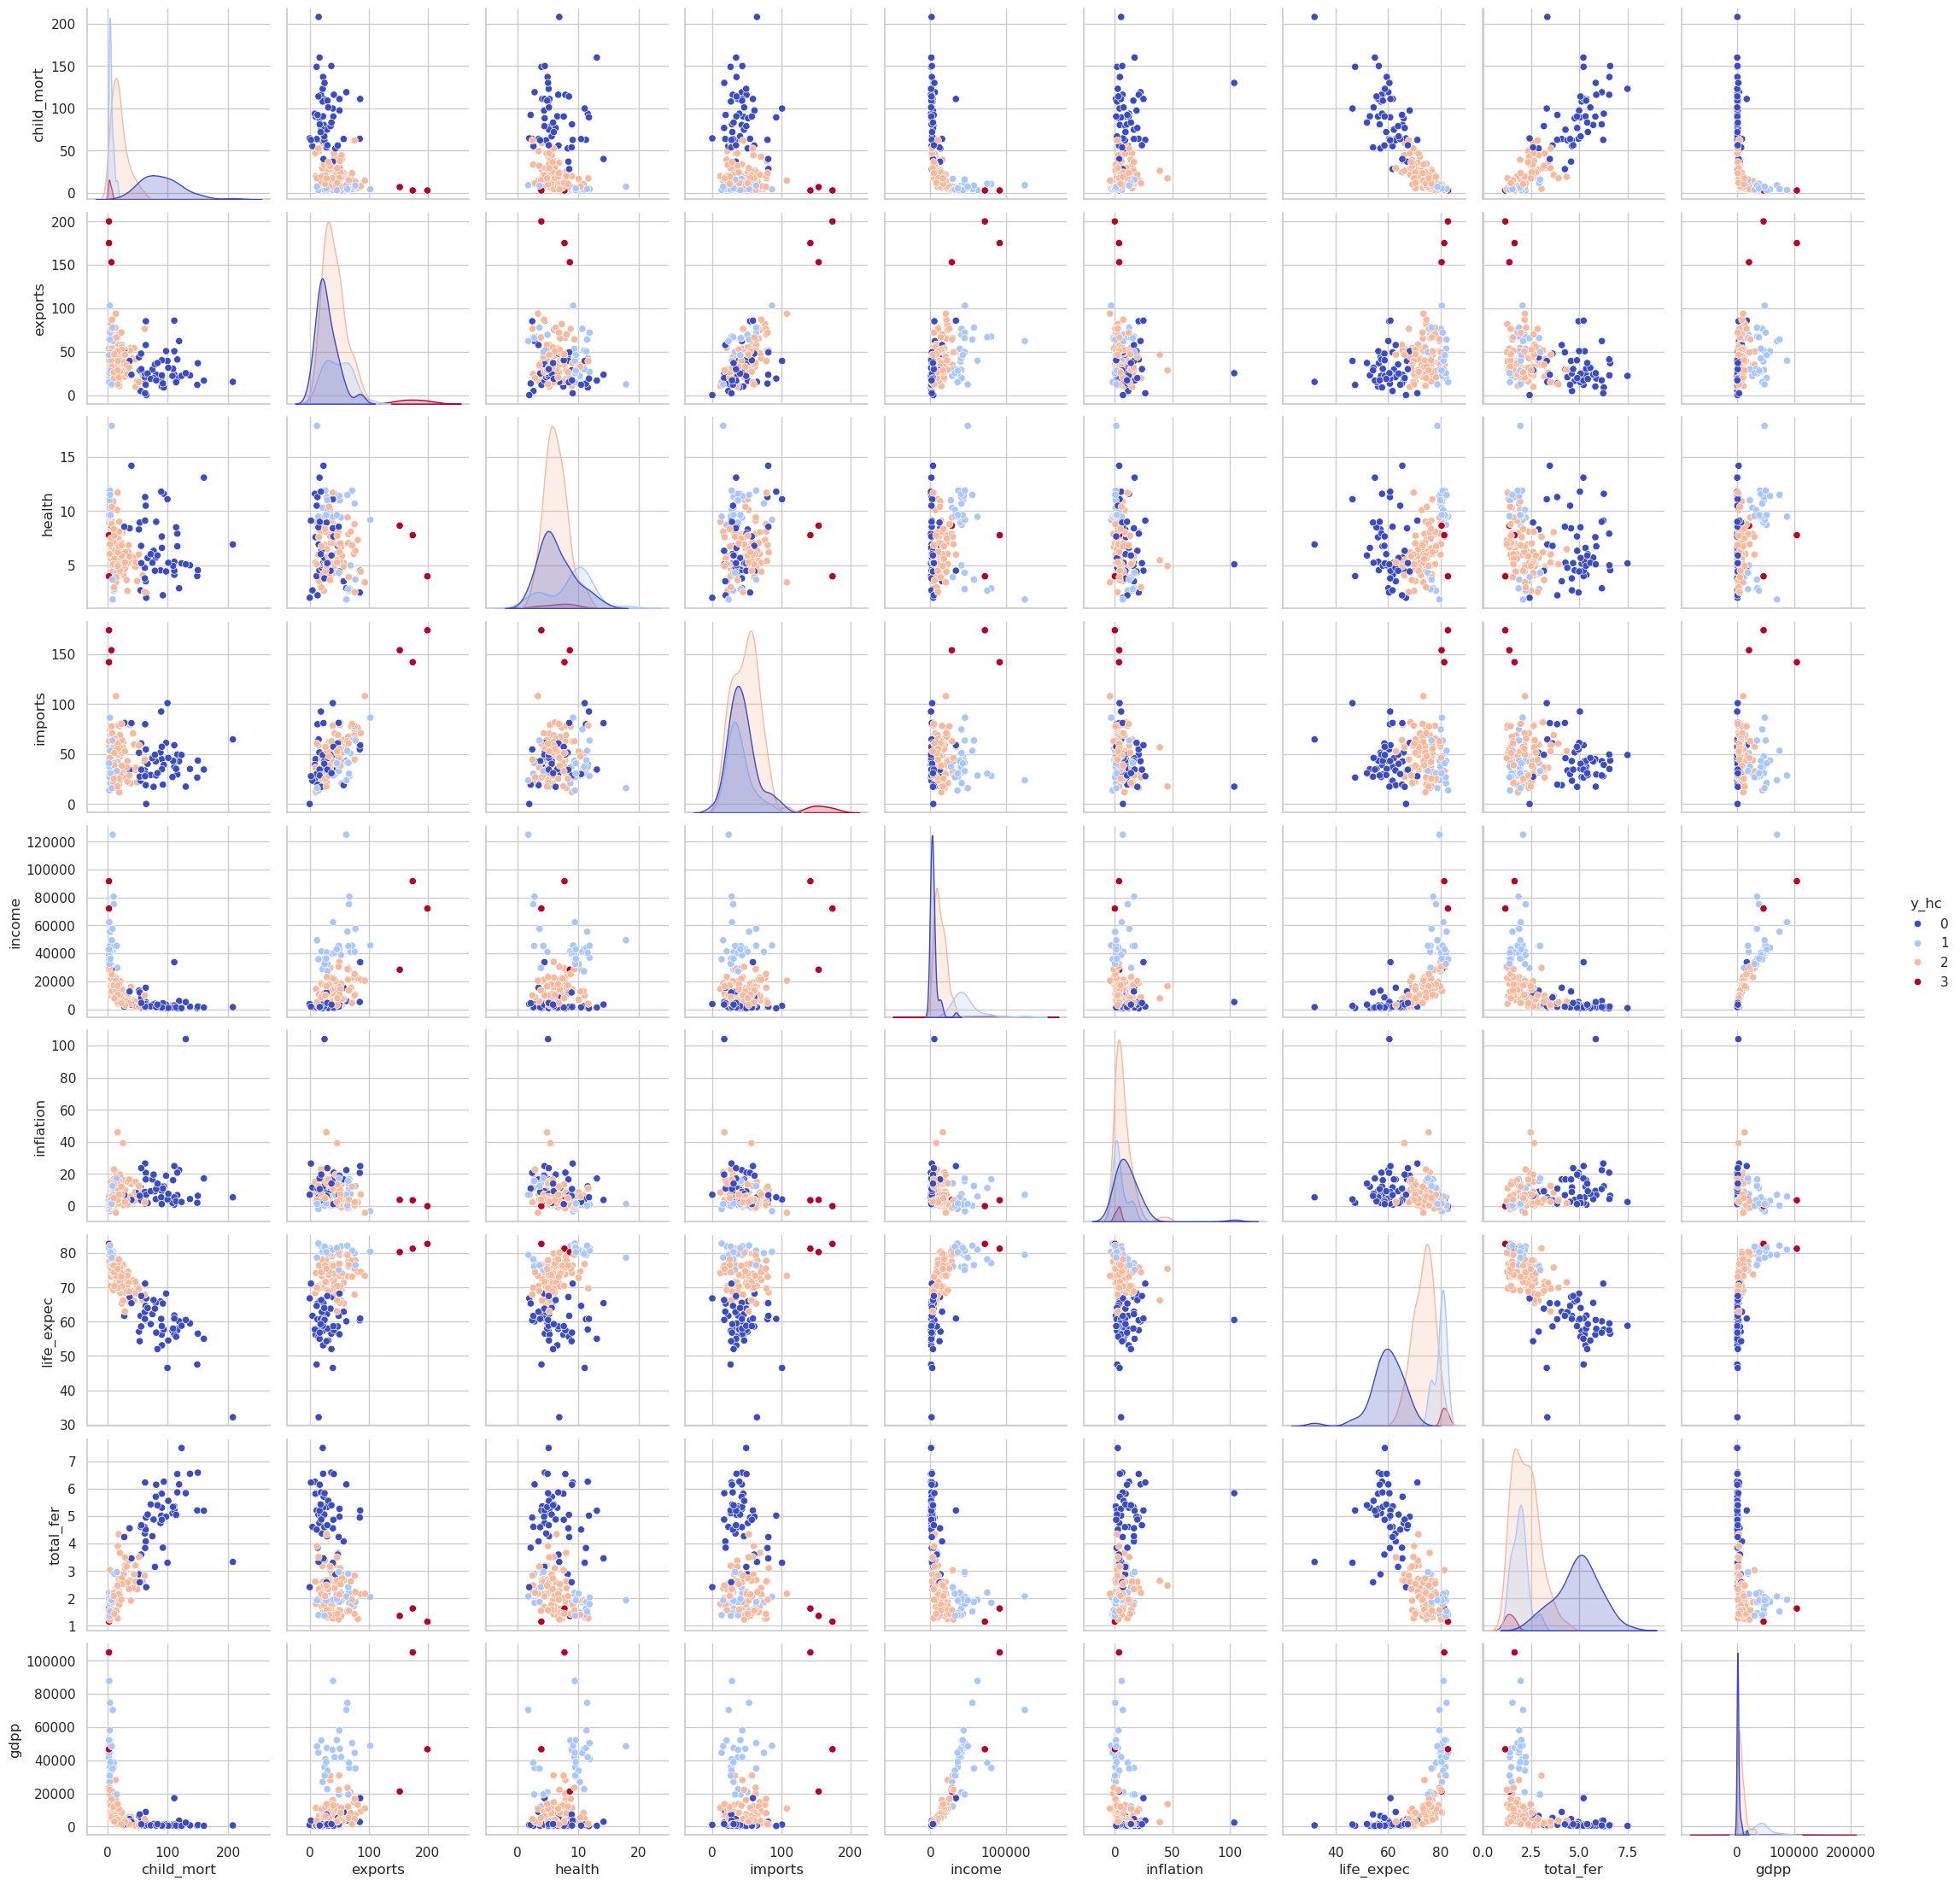

In [42]:
sns.pairplot(data = df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'y_hc']], hue='y_hc', palette='coolwarm')
plt.show()